# Importing necessary libraries

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold,GridSearchCV

# Reading Dataset

In [2]:
df=pd.read_csv(r"C:\Users\ajmal\Downloads\DSA\salarydata_train.csv")

In [3]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,41,State-gov,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,40,>50K
1,39,State-gov,10,Separated,Exec-managerial,Unmarried,Black,Female,30,<=50K
2,58,State-gov,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,>50K
3,57,State-gov,16,Divorced,Prof-specialty,Unmarried,White,Female,50,<=50K
4,32,State-gov,9,Married-civ-spouse,Protective-serv,Husband,White,Male,45,<=50K
...,...,...,...,...,...,...,...,...,...,...
26570,58,Federal-gov,10,Married-civ-spouse,Tech-support,Husband,Asian-Pac-Islander,Male,40,>50K
26571,40,Federal-gov,10,Never-married,Adm-clerical,Own-child,White,Female,40,<=50K
26572,49,Federal-gov,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,60,>50K
26573,57,Federal-gov,10,Divorced,Adm-clerical,Own-child,White,Male,40,<=50K


# EDA

In [4]:
df1=df.groupby(['salary','workclass']).size().reset_index()

In [5]:
df1

,salary,workclass,0
0,<=50K,Federal-gov,578
1,<=50K,Local-gov,1458
2,<=50K,Private,17410
3,<=50K,State-gov,935
4,>50K,Federal-gov,365
5,>50K,Local-gov,609
6,>50K,Private,4876
7,>50K,State-gov,344


<AxesSubplot:xlabel='workclass', ylabel='count'>

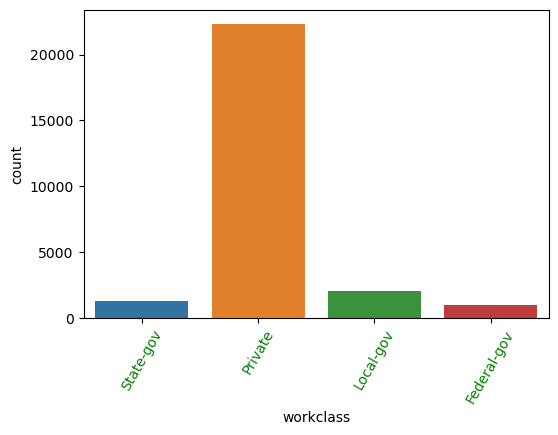

In [6]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=60,color='green')
sns.countplot(x='workclass',data=df)

In [7]:
df.isna().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
salary            0
dtype: int64

In [8]:
df.nunique()

age               72
workclass          4
education-num     16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
hours-per-week    90
salary             2
dtype: int64

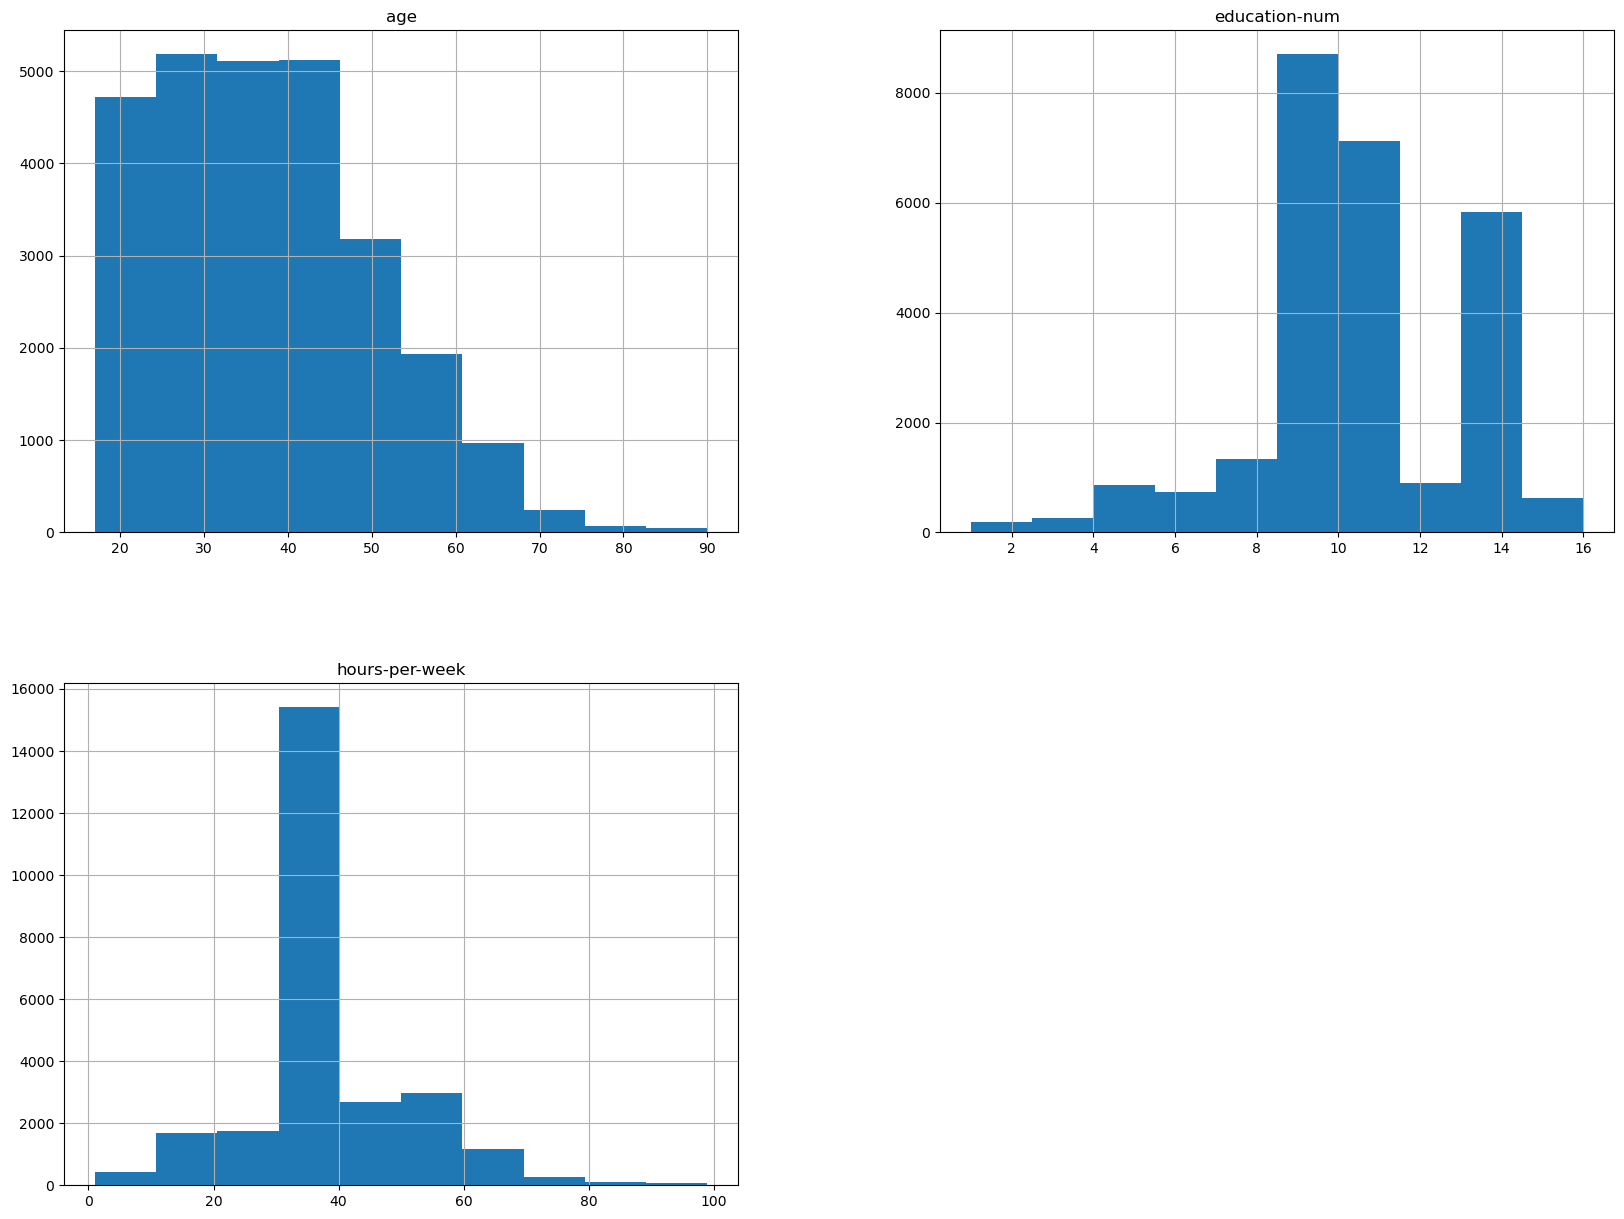

In [9]:
df.hist(figsize=[20,15]);

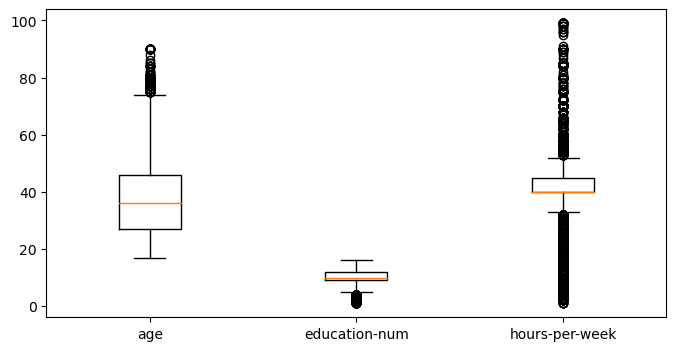

In [10]:
labels = ('age','education-num','hours-per-week')
plt.figure(figsize=(8,4))
plt.boxplot(df[['age','education-num','hours-per-week']])
plt.xticks(np.arange(len(labels))+1,labels)
plt.show()

# Label encoding and Splitting the dataset

In [11]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns 

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [12]:
df1=MultiColumnLabelEncoder(columns = ['workclass','marital-status','occupation','relationship','race','sex']).fit_transform(df)

In [13]:
df1

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,41,3,13,2,4,0,4,1,40,>50K
1,39,3,10,5,3,4,2,0,30,<=50K
2,58,3,14,2,9,0,4,1,50,>50K
3,57,3,16,0,9,4,4,0,50,<=50K
4,32,3,9,2,10,0,4,1,45,<=50K
...,...,...,...,...,...,...,...,...,...,...
26570,58,0,10,2,12,0,1,1,40,>50K
26571,40,0,10,4,0,3,4,0,40,<=50K
26572,49,0,12,2,0,0,4,1,60,>50K
26573,57,0,10,0,0,3,4,1,40,<=50K


In [14]:
df1=df1.sort_values(by=['salary'])

<AxesSubplot:>

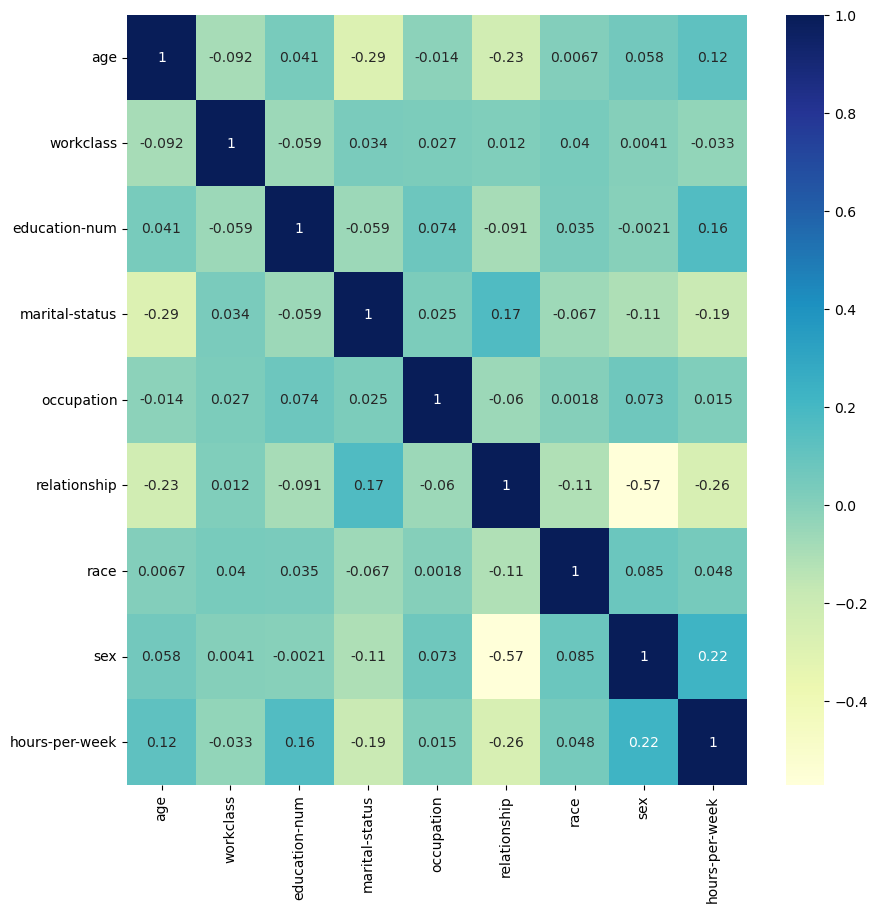

In [15]:
plt.figure(figsize=(10,10))
corr_matrix=df1.corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

In [16]:
ss= StandardScaler()
df[['age', 'hours-per-week']] = ss.fit_transform(df[['age', 'hours-per-week']].values)

In [17]:
x = df1.drop(['salary'],axis=1)
y = df1['salary']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4,random_state =42)
x_val, x_test, y_val, y_test = train_test_split(x_test,y_test,test_size = 0.5,random_state =42)

In [18]:
#x = ss.fit_transform(x.values)

In [19]:
#y_test

# Classification Models with gridsearch and hyperparameter tuning

In [20]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

# Random Forest

In [21]:
rf_model = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv_rf = GridSearchCV(rf_model, parameters, cv=5)
cv_rf.fit(x_train, y_train.values.ravel())

print_results(cv_rf)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 50}

0.805 (+/-0.045) for {'max_depth': 2, 'n_estimators': 5}
0.814 (+/-0.021) for {'max_depth': 2, 'n_estimators': 50}
0.82 (+/-0.008) for {'max_depth': 2, 'n_estimators': 250}
0.829 (+/-0.013) for {'max_depth': 4, 'n_estimators': 5}
0.829 (+/-0.009) for {'max_depth': 4, 'n_estimators': 50}
0.83 (+/-0.009) for {'max_depth': 4, 'n_estimators': 250}
0.842 (+/-0.008) for {'max_depth': 8, 'n_estimators': 5}
0.845 (+/-0.01) for {'max_depth': 8, 'n_estimators': 50}
0.845 (+/-0.009) for {'max_depth': 8, 'n_estimators': 250}
0.826 (+/-0.015) for {'max_depth': 16, 'n_estimators': 5}
0.836 (+/-0.012) for {'max_depth': 16, 'n_estimators': 50}
0.837 (+/-0.009) for {'max_depth': 16, 'n_estimators': 250}
0.815 (+/-0.002) for {'max_depth': 32, 'n_estimators': 5}
0.826 (+/-0.006) for {'max_depth': 32, 'n_estimators': 50}
0.828 (+/-0.008) for {'max_depth': 32, 'n_estimators': 250}
0.817 (+/-0.003) for {'max_depth': None, 'n_estimators': 5}
0.826 (+/-0.006)

In [22]:
RF=cv_rf.best_estimator_

In [23]:
y_val_pred_rf=RF.predict(x_val)

In [24]:
accuracy_score(y_val,y_val_pred_rf)

0.8415804327375352

In [25]:
print(classification_report(y_val,y_val_pred_rf))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4118
        >50K       0.69      0.53      0.60      1197

    accuracy                           0.84      5315
   macro avg       0.78      0.73      0.75      5315
weighted avg       0.83      0.84      0.83      5315



# Decision Tree

In [26]:
dt_model = DecisionTreeClassifier()
parameters = {
    'max_depth':[2, 4, 8, 16, 32, None],
    'min_samples_leaf':[2,5,10,15,20],
    'min_samples_split':[8,10,12,18,20],
    'criterion':['gini','entropy']
}

cv_dt = GridSearchCV(dt_model, parameters, cv=5)
cv_dt.fit(x_train, y_train.values.ravel())
print_results(cv_dt)

BEST PARAMS: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 8}

0.82 (+/-0.007) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.82 (+/-0.007) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.82 (+/-0.007) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 12}
0.82 (+/-0.007) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 18}
0.82 (+/-0.007) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 20}
0.82 (+/-0.007) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.82 (+/-0.007) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 10}
0.82 (+/-0.007) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 12}
0.82 (+/-0.007) for {'criterion': 'gini', 'max_depth':

In [27]:
DT=cv_dt.best_estimator_

In [28]:
y_val_pred_dt=DT.predict(x_val)

In [29]:
accuracy_score(y_val,y_val_pred_dt)

0.8344308560677328

In [30]:
print(classification_report(y_val,y_val_pred_dt))

              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.90      4118
        >50K       0.65      0.57      0.61      1197

    accuracy                           0.83      5315
   macro avg       0.77      0.74      0.75      5315
weighted avg       0.83      0.83      0.83      5315



# SVC

In [31]:
svc_model = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv_svc = GridSearchCV(svc_model, parameters, cv=5)
cv_svc.fit(x_train, y_train.values.ravel())
print_results(cv_svc)

BEST PARAMS: {'C': 10, 'kernel': 'rbf'}

0.815 (+/-0.013) for {'C': 0.1, 'kernel': 'linear'}
0.779 (+/-0.004) for {'C': 0.1, 'kernel': 'rbf'}
0.815 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.815 (+/-0.009) for {'C': 1, 'kernel': 'rbf'}
0.815 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.819 (+/-0.009) for {'C': 10, 'kernel': 'rbf'}


In [32]:
SVM=cv_svc.best_estimator_

In [33]:
y_val_pred_svm=SVM.predict(x_val)

In [34]:
accuracy_score(y_val,y_val_pred_svm)

0.8199435559736594

In [35]:
print(classification_report(y_val,y_val_pred_svm))

              precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89      4118
        >50K       0.69      0.36      0.48      1197

    accuracy                           0.82      5315
   macro avg       0.76      0.66      0.68      5315
weighted avg       0.80      0.82      0.80      5315



# Logistic Regression

In [36]:
lr_model = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv_lr = GridSearchCV(lr_model, parameters, cv=5)
cv_lr.fit(x_train, y_train.values.ravel())
print_results(cv_lr)

C:\Users\ajmal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ajmal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BEST PARAMS: {'C': 1}

0.81 (+/-0.009) for {'C': 0.001}
0.813 (+/-0.012) for {'C': 0.01}
0.814 (+/-0.011) for {'C': 0.1}
0.814 (+/-0.01) for {'C': 1}
0.814 (+/-0.012) for {'C': 10}
0.814 (+/-0.011) for {'C': 100}
0.813 (+/-0.011) for {'C': 1000}


C:\Users\ajmal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
LR=cv_lr.best_estimator_

In [38]:
y_val_pred_lr=LR.predict(x_val)

In [39]:
accuracy_score(y_val,y_val_pred_lr)

0.8171213546566322

In [40]:
print(classification_report(y_val,y_val_pred_lr))

              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      4118
        >50K       0.65      0.41      0.50      1197

    accuracy                           0.82      5315
   macro avg       0.75      0.67      0.70      5315
weighted avg       0.80      0.82      0.80      5315



# KNN

In [43]:
knn_model = KNeighborsClassifier()
parameters = {
    'leaf_size': [5, 10, 20,30],
    'n_neighbors': [2, 4, 8,16]
    }

cv_knn = GridSearchCV(knn_model, parameters, cv=5)
cv_knn.fit(x_train, y_train.values.ravel())

print_results(cv_knn)

C:\Users\ajmal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ajmal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

BEST PARAMS: {'leaf_size': 30, 'n_neighbors': 16}

0.801 (+/-0.006) for {'leaf_size': 5, 'n_neighbors': 2}
0.814 (+/-0.005) for {'leaf_size': 5, 'n_neighbors': 4}
0.817 (+/-0.008) for {'leaf_size': 5, 'n_neighbors': 8}
0.818 (+/-0.008) for {'leaf_size': 5, 'n_neighbors': 16}
0.801 (+/-0.006) for {'leaf_size': 10, 'n_neighbors': 2}
0.815 (+/-0.005) for {'leaf_size': 10, 'n_neighbors': 4}
0.817 (+/-0.008) for {'leaf_size': 10, 'n_neighbors': 8}
0.817 (+/-0.007) for {'leaf_size': 10, 'n_neighbors': 16}
0.801 (+/-0.006) for {'leaf_size': 20, 'n_neighbors': 2}
0.814 (+/-0.004) for {'leaf_size': 20, 'n_neighbors': 4}
0.817 (+/-0.006) for {'leaf_size': 20, 'n_neighbors': 8}
0.819 (+/-0.006) for {'leaf_size': 20, 'n_neighbors': 16}
0.802 (+/-0.006) for {'leaf_size': 30, 'n_neighbors': 2}
0.814 (+/-0.005) for {'leaf_size': 30, 'n_neighbors': 4}
0.817 (+/-0.006) for {'leaf_size': 30, 'n_neighbors': 8}
0.819 (+/-0.007) for {'leaf_size': 30, 'n_neighbors': 16}


In [44]:
KNN=cv_knn.best_estimator_

In [45]:
y_val_pred_knn=KNN.predict(x_val)

C:\Users\ajmal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [46]:
accuracy_score(y_val,y_val_pred_knn)

0.8142991533396049

In [47]:
print(classification_report(y_val,y_val_pred_knn))

              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.88      4118
        >50K       0.61      0.49      0.54      1197

    accuracy                           0.81      5315
   macro avg       0.73      0.70      0.71      5315
weighted avg       0.80      0.81      0.81      5315

